# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Create Files_Name
image_data='/kaggle/input/comebinedata/combinedata'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])


,Files_Name
0,pituitcombine
1,notumor
2,gliomacombine
3,menincombine


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/comebinedata/combinedata/pituitc...,pituitcombine
1,/kaggle/input/comebinedata/combinedata/pituitc...,pituitcombine
2,/kaggle/input/comebinedata/combinedata/notumor...,notumor
3,/kaggle/input/comebinedata/combinedata/pituitc...,pituitcombine
4,/kaggle/input/comebinedata/combinedata/notumor...,notumor
...,...,...
395,/kaggle/input/comebinedata/combinedata/gliomac...,gliomacombine
396,/kaggle/input/comebinedata/combinedata/meninco...,menincombine
397,/kaggle/input/comebinedata/combinedata/gliomac...,gliomacombine
398,/kaggle/input/comebinedata/combinedata/pituitc...,pituitcombine


# Visualization

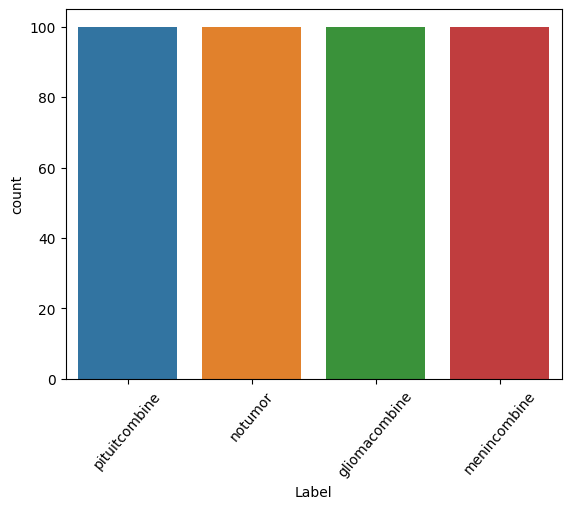

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [7]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
image_data1='/kaggle/input/brain-mri-scans-for-brain-tumor-classification/data'
validation= tf.keras.preprocessing.image_dataset_from_directory(
    image_data1,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 400 files belonging to 4 classes.
Using 320 files for training.
Found 1311 files belonging to 4 classes.
Using 262 files for validation.


In [8]:
class_names = train.class_names
class_names

['gliomacombine', 'menincombine', 'notumor', 'pituitcombine']

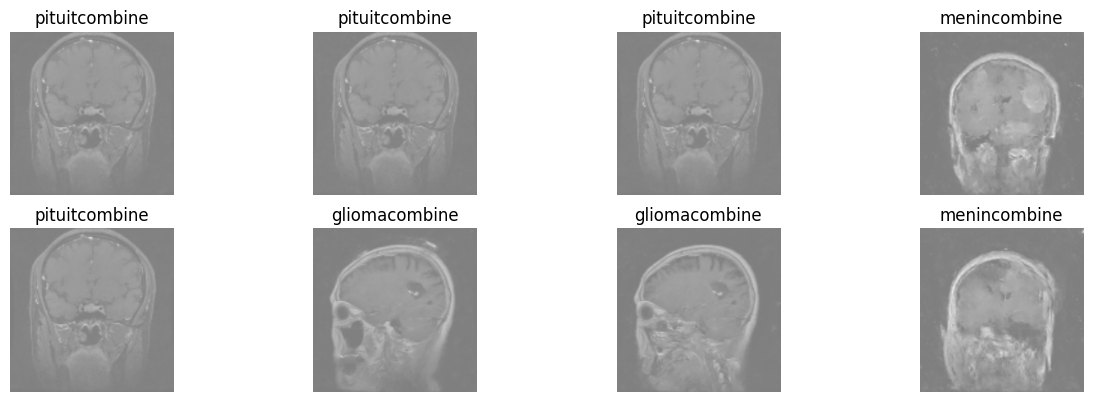

In [9]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model

In [10]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(4,activation=tf.nn.softmax))
keras_model.summary()

4334752/4334752 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 4)                 112900    
                                                                 
Total params: 1,052,020
Trainable params: 112,900
Non-trainable params: 939,120
_________________________________________________________________


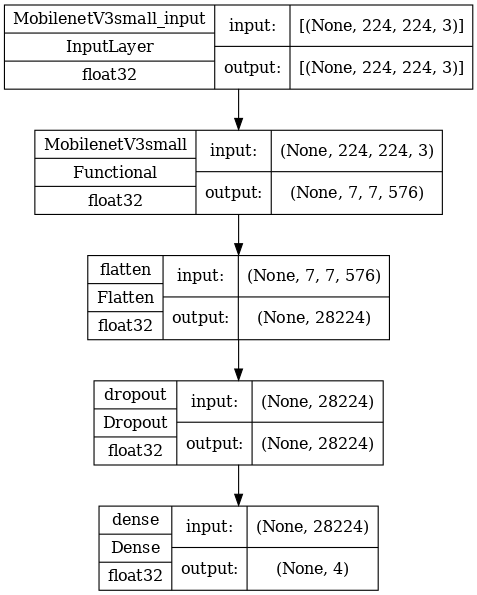

In [11]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [12]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [13]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [14]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
10/10 [==============================] - 11s 692ms/step - loss: 0.9581 - accuracy: 0.8375 - val_loss: 8.6595 - val_accuracy: 0.4656
Epoch 2/20
10/10 [==============================] - 5s 544ms/step - loss: 0.0041 - accuracy: 0.9969 - val_loss: 12.2477 - val_accuracy: 0.4771
Epoch 3/20
10/10 [==============================] - 5s 494ms/step - loss: 0.0044 - accuracy: 0.9969 - val_loss: 12.2030 - val_accuracy: 0.4924
Epoch 4/20
10/10 [==============================] - 5s 442ms/step - loss: 2.6524e-07 - accuracy: 1.0000 - val_loss: 11.8901 - val_accuracy: 0.5153
Epoch 5/20
10/10 [==============================] - 5s 448ms/step - loss: 3.1534e-06 - accuracy: 1.0000 - val_loss: 11.8232 - val_accuracy: 0.5115
Epoch 6/20
10/10 [==============================] - 5s 526ms/step - loss: 4.3958e-08 - accuracy: 1.0000 - val_loss: 11.8057 - val_accuracy: 0.5153


In [24]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

9/9 [==============================] - 2s 182ms/step - loss: 8.6595 - accuracy: 0.4656
Test Loss = 8.65953254699707
Test Accuracy = 0.4656488597393036


In [25]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,9.580578e-01,0.837500,8.659532,0.465649
1,4.139421e-03,0.996875,12.247665,0.477099
2,4.392711e-03,0.996875,12.203018,0.492366
3,2.652359e-07,1.000000,11.890116,0.515267
4,3.153378e-06,1.000000,11.823183,0.511450
5,4.395820e-08,1.000000,11.805737,0.515267


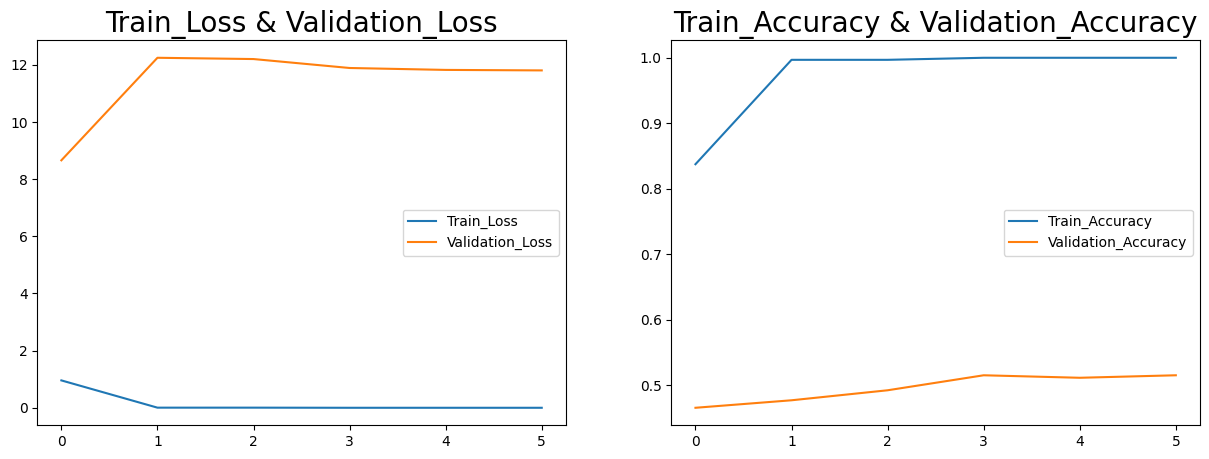

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [27]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

9/9 [==============================] - 2s 194ms/step


,Actual,Prediction
0,2,2
1,0,2
2,3,2
3,3,0
4,1,1
...,...,...
257,1,2
258,2,2
259,1,0
260,3,0


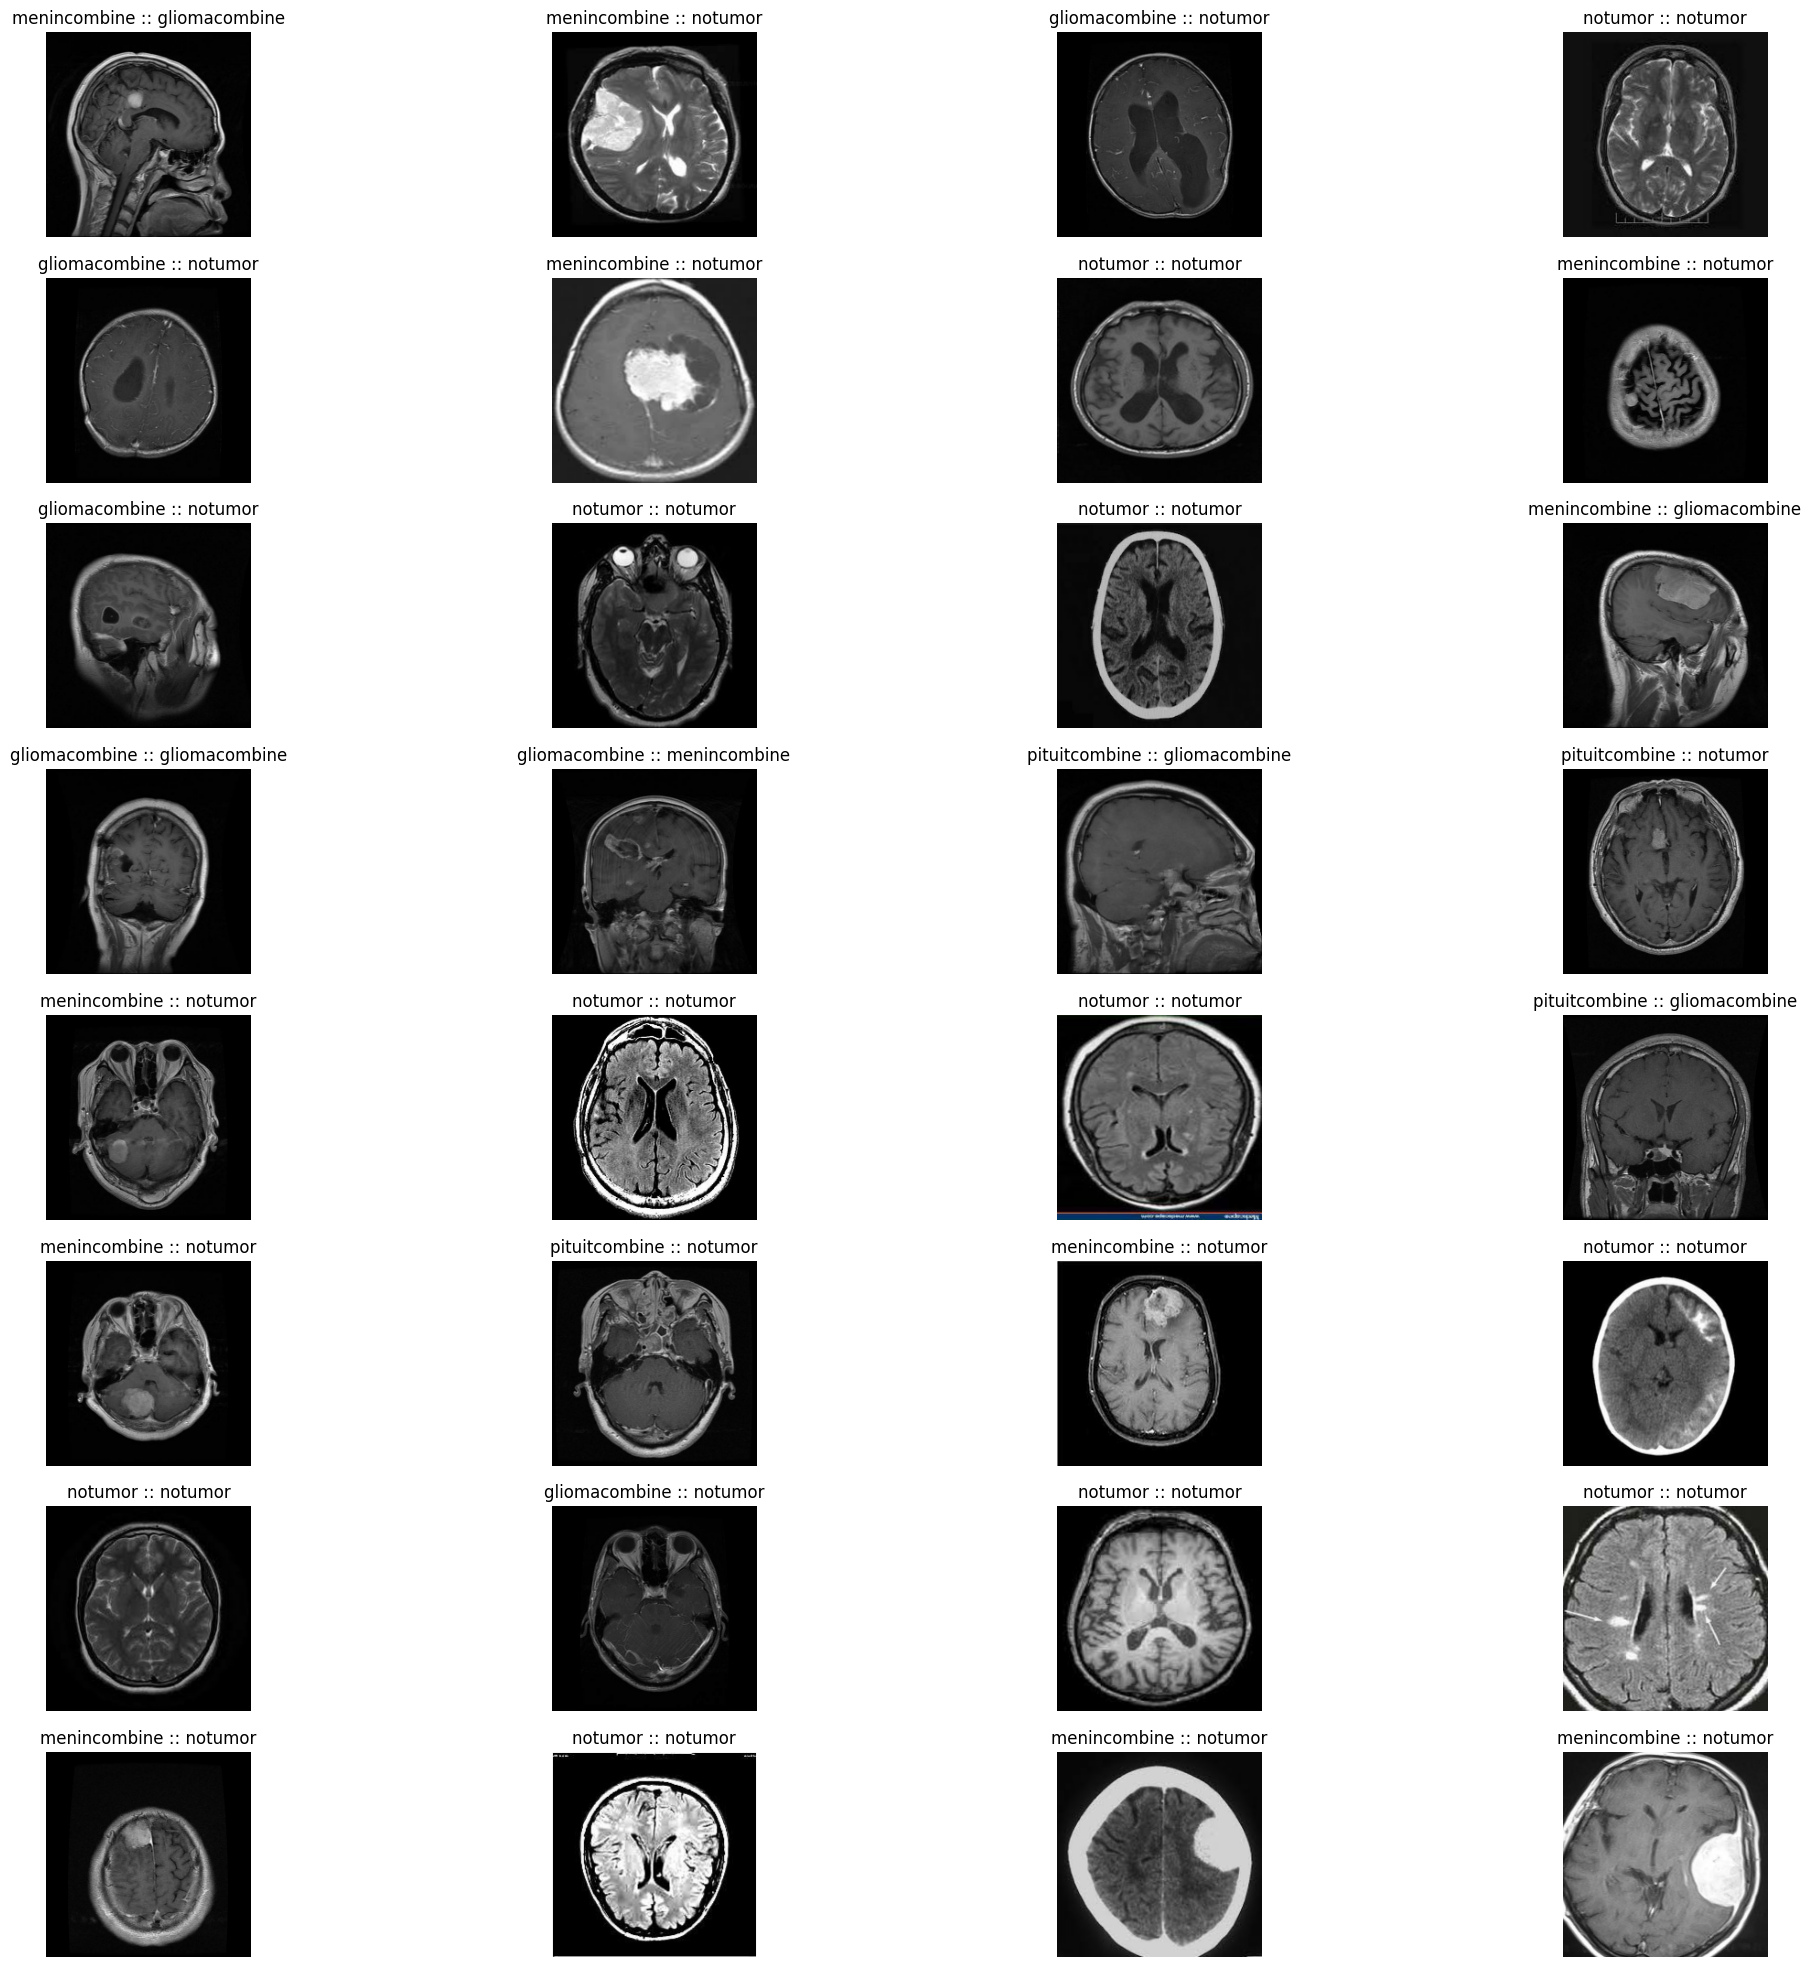

In [19]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

# Confusion_matrix

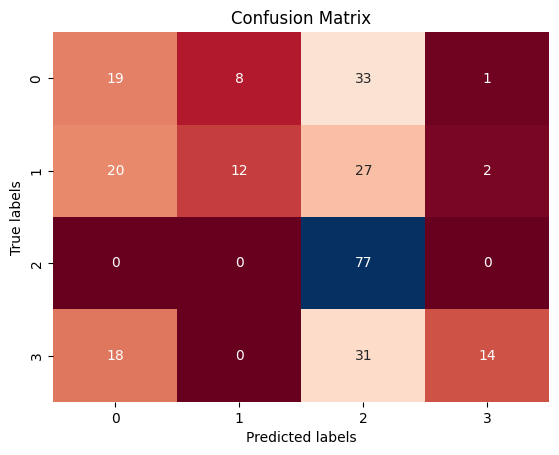

array([[19,  8, 33,  1],
       [20, 12, 27,  2],
       [ 0,  0, 77,  0],
       [18,  0, 31, 14]])

In [22]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [23]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 46.565%
